In [1]:
from scipy import stats
from scipy.stats import pearsonr, kendalltau

srcc = stats.spearmanr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc0 = pearsonr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc1 = kendalltau( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])

srcc[0],srcc0[0],srcc1[0]

(-0.3369615411989142, -0.31079259594045033, -0.23766989273624328)

In [2]:
import torch
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())


NVIDIA GeForce GTX 1050
True


In [3]:
%cd ..


d:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA


In [4]:
from test_DistillationIQA_single import DistillationIQASolver


obj_org = DistillationIQASolver(net_mode="org",student_address='./model_zoo/NAR_student_cross_dataset.pth')

normal mode...
>>>>>  ./model_zoo/NAR_student_cross_dataset.pth


In [5]:
from test_DistillationIQA_single import DistillationIQASolver

obj_stackV2 = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/stackingV2-ep70.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/stackingV2-ep70.pth


# dst:

In [6]:
import random , glob

def get_random_HR_images():
    all_images = glob.glob('D:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA\dataset\DIV2K_ref/val_HR/*')
    return random.sample(all_images, 1)[0]


get_random_HR_images()

'D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0865.png'

In [7]:
import glob
TID_ADDR = "dataset/TID2013"
dsts = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24"]


def get_images_dst(dst_type):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*_'+ dst_type +'_'+ '*' +'.*')
    return imgs

def get_mos_dst(dst_type ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1].split('_')[1] == dst_type:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


refs = glob.glob(TID_ADDR+'/reference_images/*')

refs_for_dst = []

for elem in refs:
    for i in range(5):
        refs_for_dst.append(elem)



contents = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24","25"]


def get_images_content(im_name):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*'+im_name+'_'+ '*' +'_'+ '*' +'.*')
    return imgs

def get_mos_content(im_name ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1][1:3] == im_name:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


def get_refs_content(content):
        return glob.glob(TID_ADDR+'/reference_images/*'+content+'*') * 120

In [13]:
len(obj_stackV2.test(get_images_dst("14")[0] , refs[11], feature_extraction=True))

512

In [14]:
len(obj_org.test(get_images_dst("14")[0] , refs[11] , feature_extraction=True))

512

In [34]:
import numpy as np
row = 3


lq_features = []
diff_feature = []
all_features = []
dists = []

for c in dsts:
    imgs = get_images_dst(c)
    for i in range(len(imgs)):
        dd = obj_stackV2.test(imgs[i] , get_random_HR_images(), feature_extraction=True)
        all_features.append(dd)
        lq_features.append(dd[:256])
        diff_feature.append(dd[256:])
        dists.append(int(c))
        

  

    
    print(row)
    row +=1



lq_features = np.array(lq_features)
diff_feature = np.array(diff_feature)
all_features = np.array(all_features)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [35]:
len(lq_features[134]) , len(diff_feature[134] ) , len(all_features[134])

(256, 256, 512)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(lq_features)



c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


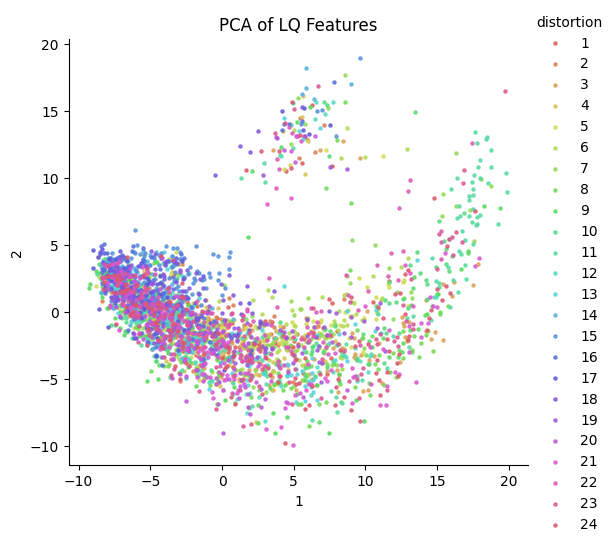

In [44]:
import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 



df = pd.DataFrame({'distortion':dists,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               })

# sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False, aspect=1.1, legend_out=False,scatter_kws={"s": 5})
sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False, aspect=1.1, legend_out=True,scatter_kws={"s": 5}).set(title='PCA of LQ Features')
# plt.legend(loc='upper right', fontsize='small')


plt.show()

c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


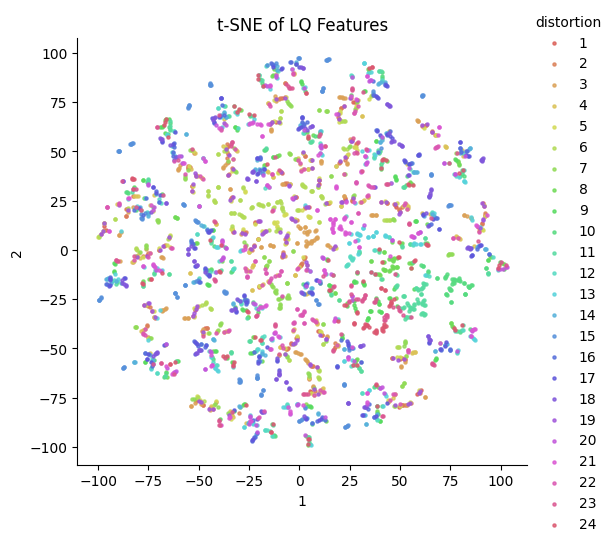

In [45]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(lq_features)

import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 

np.random.seed(176)
random.seed(16)

df = pd.DataFrame({'distortion':dists,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False, aspect=1.1, legend_out=True,scatter_kws={"s": 5}).set(title='t-SNE of LQ Features')

plt.show()

## content:

In [58]:
row = 3
import numpy as np
lq_features = []
diff_feature = []
all_features = []
contnts = []
for c in contents:
    imgs = get_images_content(c)
    for i in range(len(imgs)):
        dd = obj_stackV2.test(imgs[i] , get_random_HR_images(), feature_extraction=True)
        all_features.append(dd)
        lq_features.append(dd[:256])
        diff_feature.append(dd[256:])
        contnts.append(c)

  

    
    print(row)
    row +=1



lq_features = np.array(lq_features)
diff_feature = np.array(diff_feature)
all_features = np.array(all_features)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 

pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(lq_features)



c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


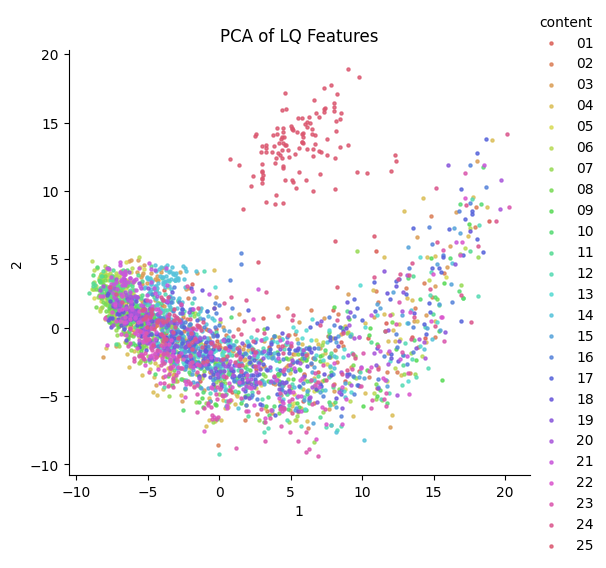

In [68]:
df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False, aspect=1.1, legend_out=True,scatter_kws={"s": 5}).set(title='PCA of LQ Features')
plt.show()

c:\Users\Farhad\.conda\envs\gpu\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


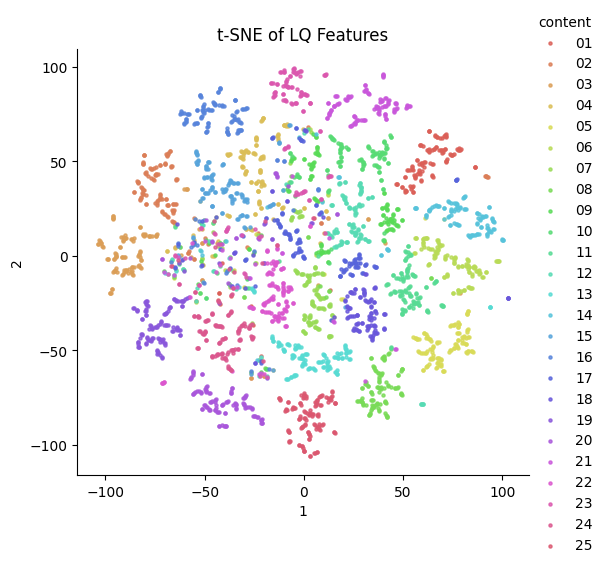

In [69]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(lq_features)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False, aspect=1.1, legend_out=True,scatter_kws={"s": 5}).set(title='t-SNE of LQ Features')
plt.show()

In [72]:
# Convert the 'contnts' list to integers
contnts_1 = [int(content) for content in contnts]

contnts_1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


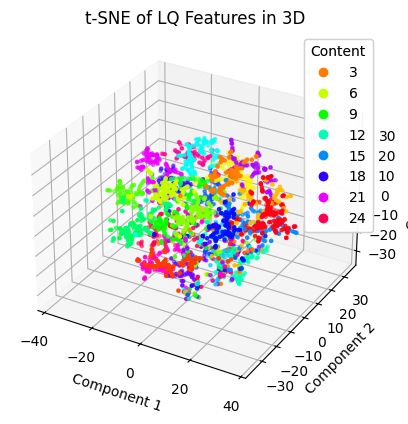

In [73]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Perform t-SNE to reduce the features to 3 dimensions
X_embedded_3d = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(lq_features)

# Create a DataFrame with the 3D t-SNE results
df_3d = pd.DataFrame({'content': contnts_1,
                      '1': X_embedded_3d[:, 0],
                      '2': X_embedded_3d[:, 1],
                      '3': X_embedded_3d[:, 2]})

# Plot the 3D t-SNE results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_3d['1'], df_3d['2'], df_3d['3'], c=df_3d['content'], cmap='hsv', s=5)

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Content")
ax.add_artist(legend1)

# Set title and labels
ax.set_title('t-SNE of LQ Features in 3D')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()
